# Series de tiempo

Las series de tiempo son datos estructurados como una variable numérica que evoluciona en el tiempo, a intervalos regulares. El PBI, el tipo de cambio, la Inflación, el nivel de exportaciones, la temperatura, la cantidad de llamadas a un call center, etc son todas variables que se pueden tratar como series de tiempo.

En https://datos.gob.ar/series podés buscar series de tiempo publicadas por distintos organismos de la Administración Pública Nacional y usar el link al CSV para leerlos directamente desde python con `pandas`.

Por ejemplo: si vas a https://datos.gob.ar/series/api/series/?ids=105.1_I2P_2016_M_13,105.1_I2CPC_2016_M_27 podés copiar la URL a un archivo CSV que tiene la evolución del precio de la papa y de la picada común (https://apis.datos.gob.ar/series/api/series/?ids=105.1_I2P_2016_M_13,105.1_I2CPC_2016_M_27&limit=5000&format=csv ).


## Librerías

`pandas` es la principal librería de análisis de datos en python. Permite leer todo tipo de formatos tabulares en un `DataFrame` (objeto principal de la librería) desde el cual luego se pueden realizar todo tipo de transformaciones, procesamientos y graficar fácilmente.

In [12]:
import pandas as pd

`matplotlib` es una librería de gráficos de python de uso muy difundido, que se usa en `pandas`.

In [13]:
# permite que los gráficos se vean directamente en el notebook
%matplotlib inline 

# aplica una hoja de estilos para los gráficos
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

## DataFrame

In [23]:
# tomamos los datos del Estimador Mensual de la Actividad Económica (consideramos 3 series EMAE/EMAE desestacionalizado/EMAE tendencia ciclo)
emae = pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=143.3_NO_PR_2004_A_21,143.3_NO_PR_2004_A_31,143.3_NO_PR_2004_A_28&limit=5000&format=csv")
   


In [15]:
# para ver las primeras filas
emae.head()

,indice_tiempo,indice_serie_original,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo
0,2004-01-01,92.627506,98.416353,96.045106
1,2004-02-01,90.186179,98.222420,96.650577
2,2004-03-01,101.883298,97.576375,97.312948
3,2004-04-01,102.567430,95.495998,98.005125
4,2004-05-01,109.877504,96.696663,98.726657


In [16]:
# para ver las últimas filas
emae.tail(10)

,indice_tiempo,indice_serie_original,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo
175,2018-08-01,145.962458,145.892223,144.096658
176,2018-09-01,138.280880,143.047814,143.371260
177,2018-10-01,142.944167,144.177918,142.780049
178,2018-11-01,140.913787,141.381482,142.330565
179,2018-12-01,136.793424,141.752314,142.020575
180,2019-01-01,135.421759,142.661038,141.841168
181,2019-02-01,132.327976,142.809588,141.781355
182,2019-03-01,144.512790,140.911273,141.828820
183,2019-04-01,151.067852,142.114127,141.968722
184,2019-05-01,163.685302,142.327823,142.186896


In [17]:
# para ver los tipos que pandas infirió al leer los datos
emae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 4 columns):
indice_tiempo                      185 non-null object
indice_serie_original              185 non-null float64
indice_serie_desestacionalizada    185 non-null float64
indice_serie_tendencia_ciclo       185 non-null float64
dtypes: float64(3), object(1)
memory usage: 5.9+ KB


Por default, la librería `pandas` asigna un índice numérico al leer una tabla nueva (si no se especifica una columna que deba ser tomada como índice). 
Esto es lo que nos pasó al crear la tabla "emae". ¿Que deberíamos hacer entonces? Identificar al campo `indice_tiempo` como el índice de la tabla y hacer que se lo reconozca como fecha y no texto.

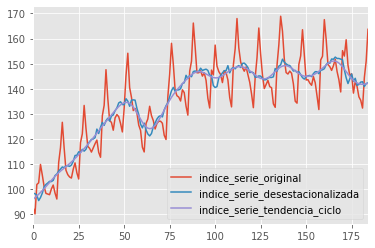

In [18]:
emae.plot()

In [19]:
#transforma todos los registros del campo "indice_tiempo" en fechas
emae["indice_tiempo"] = pd.to_datetime(emae["indice_tiempo"])


In [8]:
# ahora es de tipo fecha
emae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 4 columns):
indice_tiempo                      185 non-null datetime64[ns]
indice_serie_original              185 non-null float64
indice_serie_desestacionalizada    185 non-null float64
indice_serie_tendencia_ciclo       185 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 5.9 KB


In [24]:
# convertimos al campo "indice_tiempo" en el índice de la tabla
emae = emae.set_index("indice_tiempo")
emae.head()

,indice_serie_original,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo
indice_tiempo,,,
2004-01-01,92.627506,98.416353,96.045106
2004-02-01,90.186179,98.222420,96.650577
2004-03-01,101.883298,97.576375,97.312948
2004-04-01,102.567430,95.495998,98.005125
2004-05-01,109.877504,96.696663,98.726657


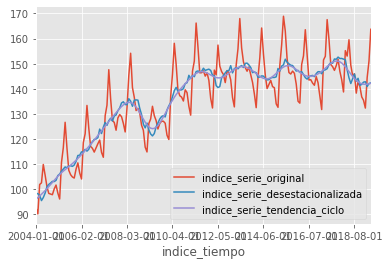

In [25]:
emae.plot()

Setear un índice, permite localizar valores puntuales más fácilmente. Los valores del índice y los nombres de las columnas actúan de "coordenadas" de la tabla.

In [10]:
emae.loc["2018-04-01", "indice_serie_original"]

153.02465148448832

O incluso aplicar filtros temporales.

Un `DataFrame` se puede guardar en una gran variedad de formatos.

In [11]:
emae.to_csv("emae.csv", encoding="utf8")
emae.to_excel("emae.xlsx", encoding="utf8")
emae.to_html("emae.html")
emae.to_stata("emae.dta")

**Ejercicio:** buscar la serie del tipo de cambio del Banco Nación (BNA vendedor), generar un índice de tiempo, guardar los datos en CSV e imprimir el valor del 1 de Enero de 2019 en el notebook.

## Gráficos simples con pandas

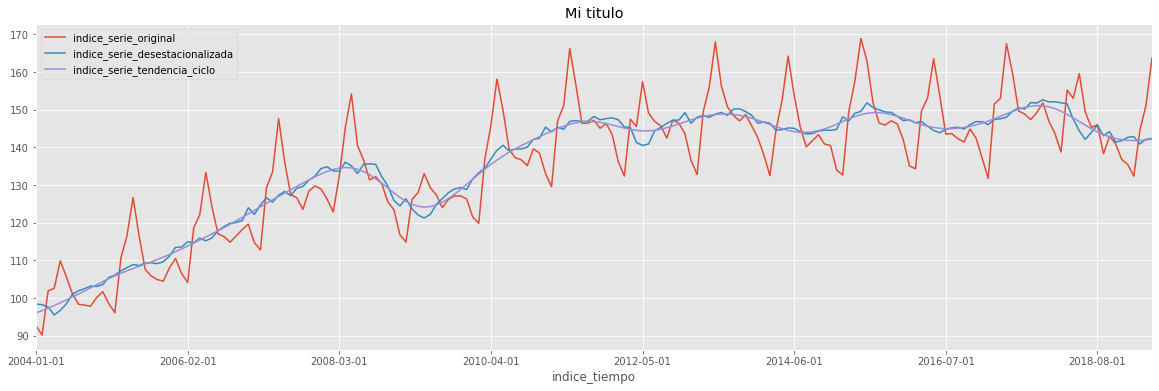

In [27]:
emae.plot(figsize=(20,6), title="Mi titulo")

Por default, pandas grafica todas las columnas numéricas como "líneas" pero existen otros tipos de gráficos que se pueden usar.

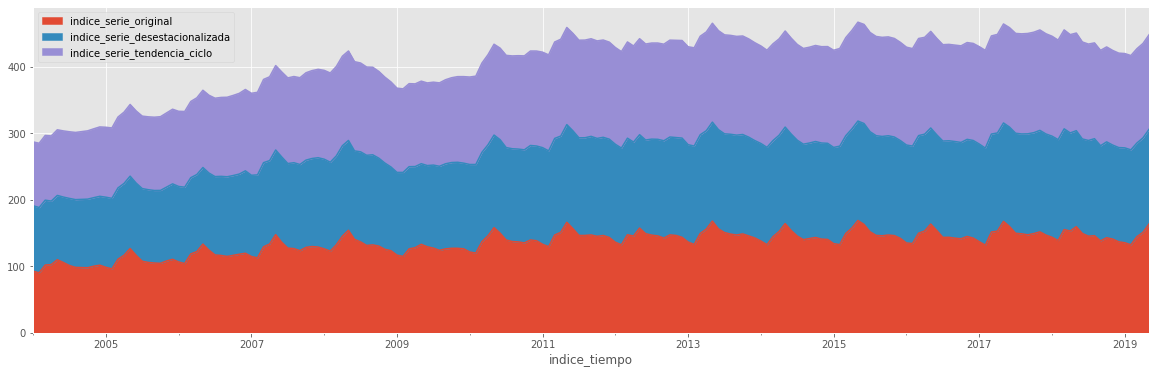

In [33]:
emae.plot(kind="area", figsize=(20,6))

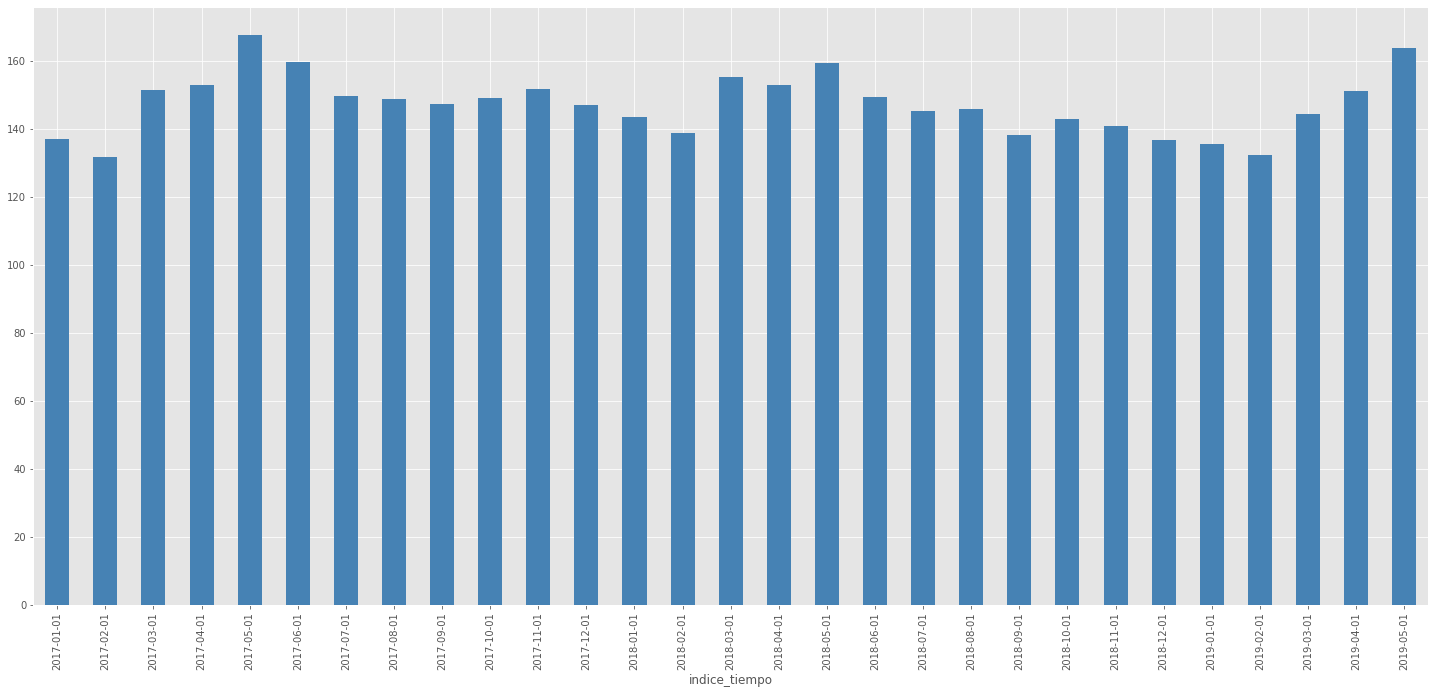

In [17]:
emae[emae.index > "20161201"].indice_serie_original.plot(figsize=(25,11), kind="bar", color="steelblue")

En el gráfico de barras el índice de tiempo se muestra como una fecha completa. Para que se muestre sólo lo necesario para la frecuencia temporal que tiene, se puede convertir el índice a "períodos" en lugar de fechas completas.

In [37]:
#tabla inicial Indice temporal completo
emae.head()

,indice_serie_original,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo
indice_tiempo,,,
2004-01-01,92.627506,98.416353,96.045106
2004-02-01,90.186179,98.222420,96.650577
2004-03-01,101.883298,97.576375,97.312948
2004-04-01,102.567430,95.495998,98.005125
2004-05-01,109.877504,96.696663,98.726657


In [35]:
emae.index = emae.index.to_period()
#Esto permite ver la tabla "emae" sólo con la info necesaria (dada la frecuencia temporal con la que contaba la tabla) 
#del índice, es decir permite ver sólo el mes y año. Al ser la medición el mismo día del mes, no era necesario mostrarlo.
emae.head()

,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo,indice_serie_original
indice_tiempo,,,
2004-01,98.416353,96.045106,92.627506
2004-02,98.222420,96.650577,90.186179
2004-03,97.576375,97.312948,101.883298
2004-04,95.495998,98.005125,102.567430
2004-05,96.696663,98.726657,109.877504


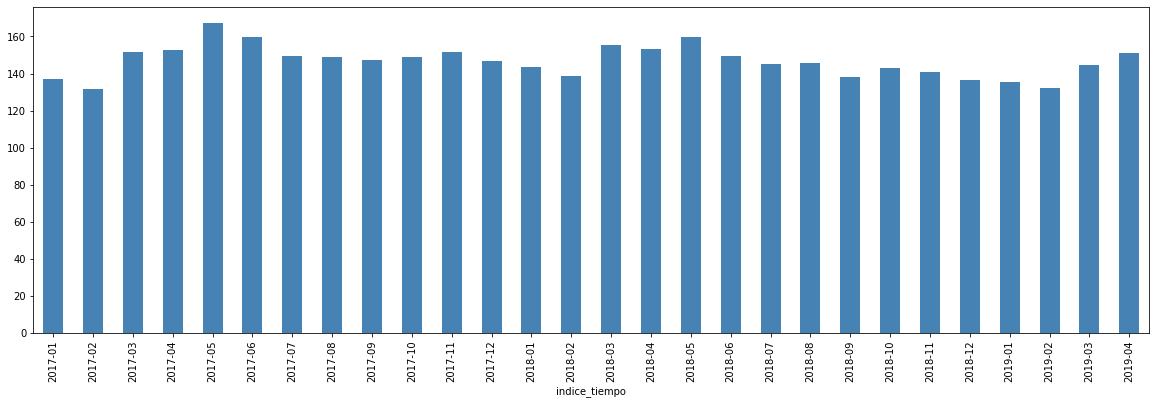

In [79]:
emae[emae.index > "201612"].indice_serie_original.plot(figsize=(20,6), kind="bar", color="steelblue")

**Ejercicio:** graficar las variaciones del emae (serie original) como cambio porcentual respecto de 12 meses atrás (variación porcentual interanual) en un gráfico de barras con el mismo color desde 2016 en adelante. CAMBIAR EL EJERCICIO O EXPLICAR ANTES EL PCT_CHANGE

NameError: name 'emae' is not defined

TypeError: Invalid comparison between dtype=datetime64[ns] and str

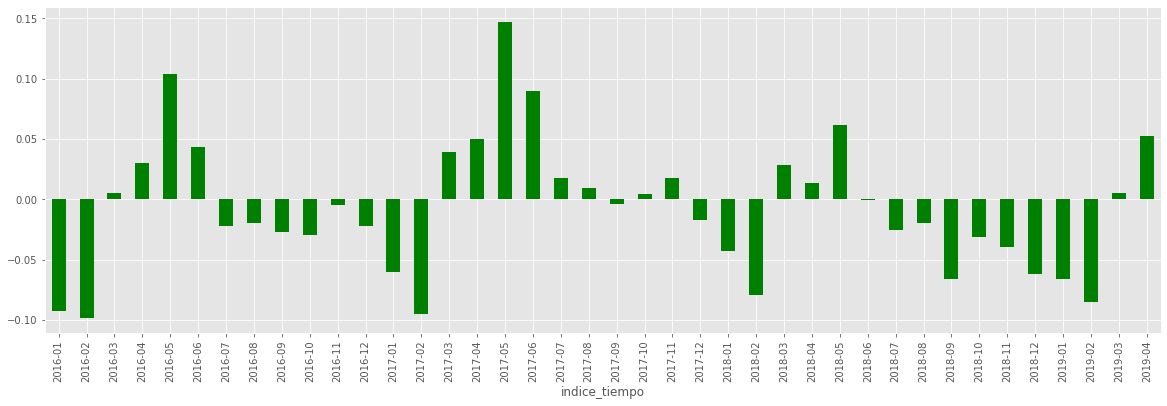

In [70]:
emae[emae.index >= "201601"].Var_porcentual_interanual.plot(figsize=(20,6), kind="bar", color="green")

## Correlación y gráficos múltiples

Ahora vas a ver cómo buscar variables que expliquen o correlacionen con una variable de interés a partir de la exploración visual y luego del análisis de correlación. En este caso vamos a descargar distintas componentes sectoriales del nivel de actividad para entender cuáles explican o correlacionan mejor con el nivel de actividad general.

In [3]:
# descargamos el emae general, construcción, industria, comercio, pesca, agricultura y hotelería
nivel_actividad = pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=11.3_VMATC_2004_M_12,143.3_NO_PR_2004_A_21,11.3_VMASD_2004_M_23,11.3_VIPAA_2004_M_5,11.3_ISOM_2004_M_39,11.3_P_2004_M_20,11.3_AGCS_2004_M_41&limit=1000&format=csv")


In [4]:

# generamos el índice de tiempo
nivel_actividad["indice_tiempo"] = pd.to_datetime(nivel_actividad["indice_tiempo"])
nivel_actividad = nivel_actividad.set_index("indice_tiempo")

El tipo de los gráficos en pandas se puede especificar tanto pasando la variable `kind` como hiciste antes, como accediendo a la función `plot` como un objeto con "subfunciones".

In [38]:
nivel_actividad.head()

,construccion,indice_serie_original,industria_manufacturera,pesca,agricultura_ganaderia_caza_silvicultura,hoteles_restaurantes,comercio_mayorista_minorista_reparaciones
indice_tiempo,,,,,,,
2004-01-01,95.938047,92.627506,91.454610,42.547868,65.995350,108.411682,92.065338
2004-02-01,98.853388,90.186179,89.424852,62.440771,64.926598,103.448256,91.464718
2004-03-01,103.124529,101.883298,101.426433,174.084646,110.666559,101.061842,109.127780
2004-04-01,95.815492,102.567430,98.437312,153.877638,150.065920,93.242999,99.420141
2004-05-01,97.994567,109.877504,100.353138,132.357664,209.388076,90.985260,100.532744


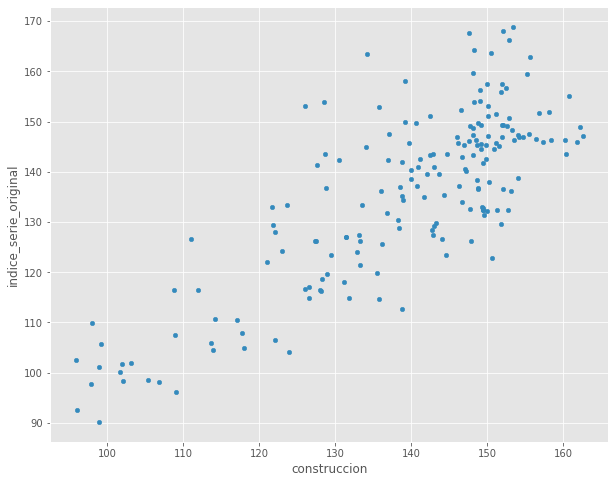

In [50]:
nivel_actividad.plot.scatter("construccion", "indice_serie_original", figsize=(10,8))

`matplotlib` permite generar un gráfico compuesto de "subgráficos" con la función `plt.subplots()`

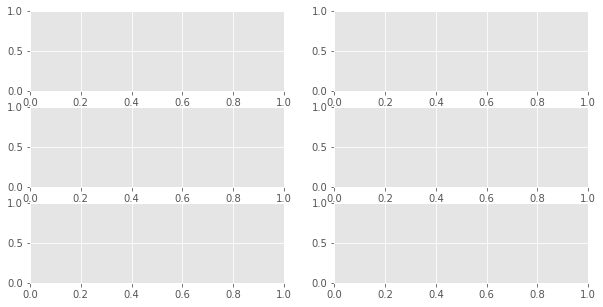

In [51]:
# genera un lienzo con 4 subgráficos vacíos
fig, axes = plt.subplots( ncols=2, figsize=(10, 5), nrows=3)

Dentro de la misma celda donde se crea el lienzo de subgráficos, deben crearse y asignarse a los "axes" c/u de los subgráficos.

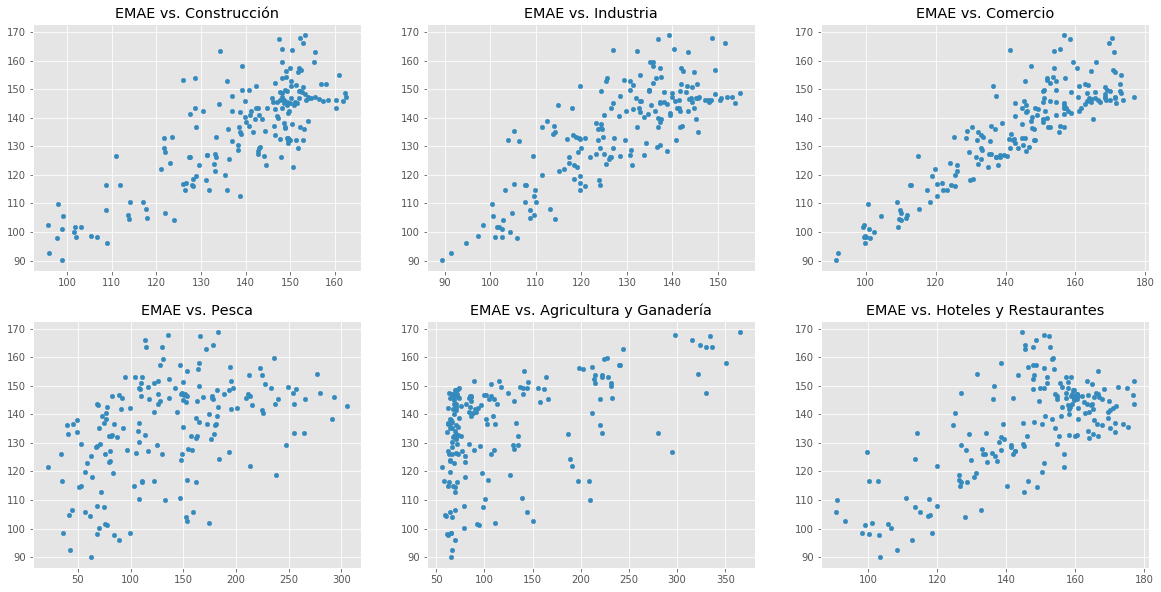

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

nivel_actividad.plot.scatter("construccion", "indice_serie_original", ax=axes[0,0], title="EMAE vs. Construcción")
nivel_actividad.plot.scatter("industria_manufacturera", "indice_serie_original", ax=axes[0,1], title="EMAE vs. Industria")
nivel_actividad.plot.scatter("comercio_mayorista_minorista_reparaciones", "indice_serie_original", ax=axes[0,2], title="EMAE vs. Comercio")

nivel_actividad.plot.scatter("pesca", "indice_serie_original", ax=axes[1,0], title="EMAE vs. Pesca")
nivel_actividad.plot.scatter("agricultura_ganaderia_caza_silvicultura", "indice_serie_original", ax=axes[1,1], title="EMAE vs. Agricultura y Ganadería")
nivel_actividad.plot.scatter("hoteles_restaurantes", "indice_serie_original", ax=axes[1,2], title="EMAE vs. Hoteles y Restaurantes")

# elimina los labels de los ejes para que se vea mejor
for row in axes:
    for ax in row:
        pass
        ax.set_xlabel("")
        ax.set_ylabel("")


La construcción, la industria, el comercio y los servicios de hotelería y restaurantes parecen correlacionar fuertemente con el nivel de actividad general, mientras que la pesca y el sector agropecuario casi no muestran relación alguna! Podés mirar la matriz de correlaciones de la tabla para corroborar esto.

In [27]:
# VER CÓMO HACER ESTA TABLA COMO UN HEATMAP
nivel_actividad.corr()

,construccion,indice_serie_original,industria_manufacturera,pesca,agricultura_ganaderia_caza_silvicultura,hoteles_restaurantes,comercio_mayorista_minorista_reparaciones
construccion,1.000000,0.806992,0.810517,0.302032,0.048874,0.823192,0.880459
indice_serie_original,0.806992,1.000000,0.840723,0.445256,0.475728,0.717857,0.914197
industria_manufacturera,0.810517,0.840723,1.000000,0.366732,0.170599,0.663064,0.936491
pesca,0.302032,0.445256,0.366732,1.000000,0.324868,0.137077,0.387705
agricultura_ganaderia_caza_silvicultura,0.048874,0.475728,0.170599,0.324868,1.000000,-0.181795,0.172752
hoteles_restaurantes,0.823192,0.717857,0.663064,0.137077,-0.181795,1.000000,0.792509
comercio_mayorista_minorista_reparaciones,0.880459,0.914197,0.936491,0.387705,0.172752,0.792509,1.000000


Si ves la pesca y el sector agropecuario en el mismo gráfico con la serie original, es evidente que estos dos sectores tienen una estacionalidad mucho más pronunciada que el nivel general de actividad, y por esto tienen una baja correlación.

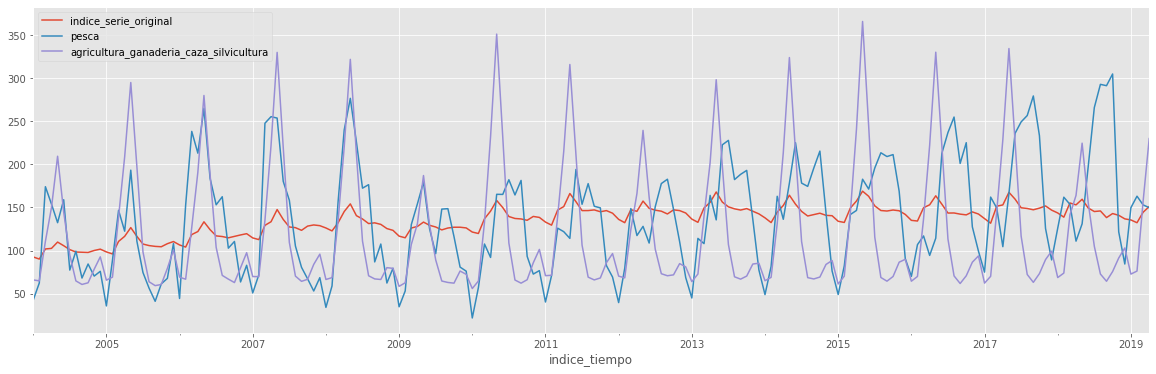

In [16]:
nivel_actividad[["indice_serie_original", "pesca", "agricultura_ganaderia_caza_silvicultura"]].plot(figsize=(20, 6))

Probablemente debas chequear si existe relación cuando se consideran las variaciones del índice, en lugar del valor absoluto. Pero el bloque de código era bastante engorroso para estar probando ágilmente esas transformaciones y cambiar rápidamente. Deberías poner ese bloque dentro de una función, cuyos argumentos de entrada sean aquellas cosas que quieras cambiar.

In [17]:
def generate_emae_scatters(nivel_actividad):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

    nivel_actividad.plot.scatter("construccion", "indice_serie_original", ax=axes[0,0], title="EMAE vs. Construcción")
    nivel_actividad.plot.scatter("industria_manufacturera", "indice_serie_original", ax=axes[0,1], title="EMAE vs. Industria")
    nivel_actividad.plot.scatter("comercio_mayorista_minorista_reparaciones", "indice_serie_original", ax=axes[0,2], title="EMAE vs. Comercio")

    nivel_actividad.plot.scatter("pesca", "indice_serie_original", ax=axes[1,0], title="EMAE vs. Pesca")
    nivel_actividad.plot.scatter("agricultura_ganaderia_caza_silvicultura", "indice_serie_original", ax=axes[1,1], title="EMAE vs. Agricultura y Ganadería")
    nivel_actividad.plot.scatter("hoteles_restaurantes", "indice_serie_original", ax=axes[1,2], title="EMAE vs. Hoteles y Restaurantes")

    # elimina los labels de los ejes para que se vea mejor
    for row in axes:
        for ax in row:
            ax.set_xlabel("")
            ax.set_ylabel("")
    
    return axes


Las variaciones mensuales del EMAE tienen una fuerte correlación con las variaciones mensuales del sector agropecuario!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000269F781E9B0>,
      dtype=object)

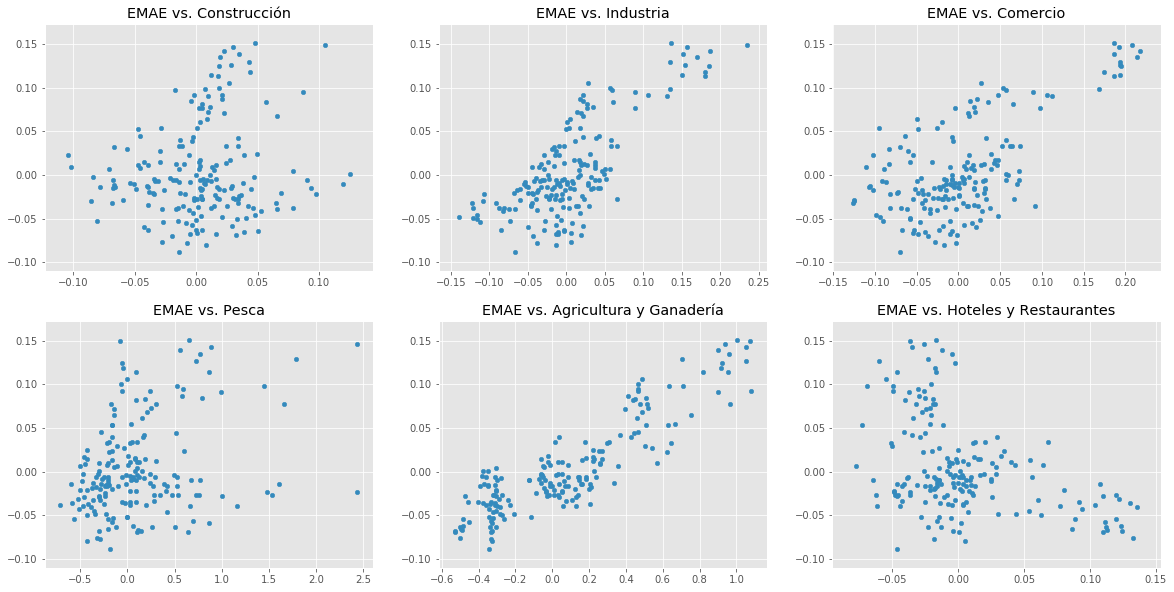

In [18]:
generate_emae_scatters(nivel_actividad.pct_change(1))

#Tomar en cuenta que "nivel_actividad.pct_change(1)" devuelve la variación porcentual intermensual (por brindar la tabla en cada registro datos mensuales)


In [19]:
nivel_actividad.pct_change(1).corr()

,construccion,indice_serie_original,industria_manufacturera,pesca,agricultura_ganaderia_caza_silvicultura,hoteles_restaurantes,comercio_mayorista_minorista_reparaciones
construccion,1.000000,0.157103,0.197925,0.098048,-0.093065,0.162635,0.427972
indice_serie_original,0.157103,1.000000,0.751099,0.311591,0.888762,-0.418115,0.660800
industria_manufacturera,0.197925,0.751099,1.000000,0.326665,0.568509,-0.192500,0.833927
pesca,0.098048,0.311591,0.326665,1.000000,0.303784,-0.388614,0.376913
agricultura_ganaderia_caza_silvicultura,-0.093065,0.888762,0.568509,0.303784,1.000000,-0.522596,0.446564
hoteles_restaurantes,0.162635,-0.418115,-0.192500,-0.388614,-0.522596,1.000000,-0.138067
comercio_mayorista_minorista_reparaciones,0.427972,0.660800,0.833927,0.376913,0.446564,-0.138067,1.000000


Las variaciones en el sector agropecuario casi siempre empujan a las variaciones en el nivel general (que obviamente ocurren en menor magnitud) ya que es un sector con una alta incidencia en la producción total en Argentina. No es este el caso de la pesca.

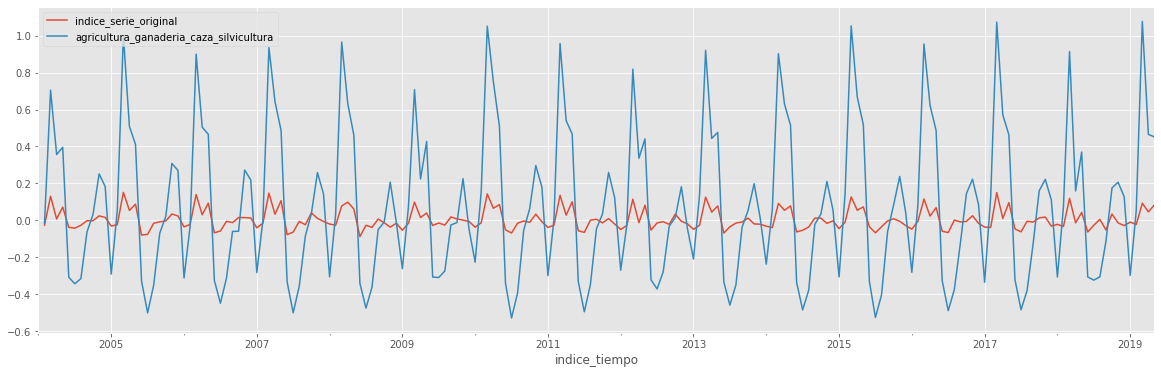

In [21]:
nivel_actividad.pct_change(1)[["indice_serie_original", "agricultura_ganaderia_caza_silvicultura"]].plot(figsize=(20, 6))

Si querés seguir la evolución de mediano plazo de la producción agropecuaria, una forma sencilla de remover el ruido estacional es aplicar un promedio móvil de 12 meses. Para esto podés usar la función `rolling` que te permite elegir una ventana de X períodos sobre la cual hacer un cálculo o una agregación.

In [30]:
#Insertamos una nueva columna con el promedio de los últimos 12 meses en la columna "agri_promedio_movil_12"
nivel_actividad["agri_promedio_movil_12"] = nivel_actividad.agricultura_ganaderia_caza_silvicultura.rolling(12).mean()
nivel_actividad.head()

,construccion,indice_serie_original,industria_manufacturera,pesca,agricultura_ganaderia_caza_silvicultura,hoteles_restaurantes,comercio_mayorista_minorista_reparaciones,agri_promedio_movil_12
indice_tiempo,,,,,,,,
2004-01-01,95.938047,92.627506,91.454610,42.547868,65.995350,108.411682,92.065338,NaN
2004-02-01,98.853388,90.186179,89.424852,62.440771,64.926598,103.448256,91.464718,NaN
2004-03-01,103.124529,101.883298,101.426433,174.084646,110.666559,101.061842,109.127780,NaN
2004-04-01,95.815492,102.567430,98.437312,153.877638,150.065920,93.242999,99.420141,NaN
2004-05-01,97.994567,109.877504,100.353138,132.357664,209.388076,90.985260,100.532744,NaN


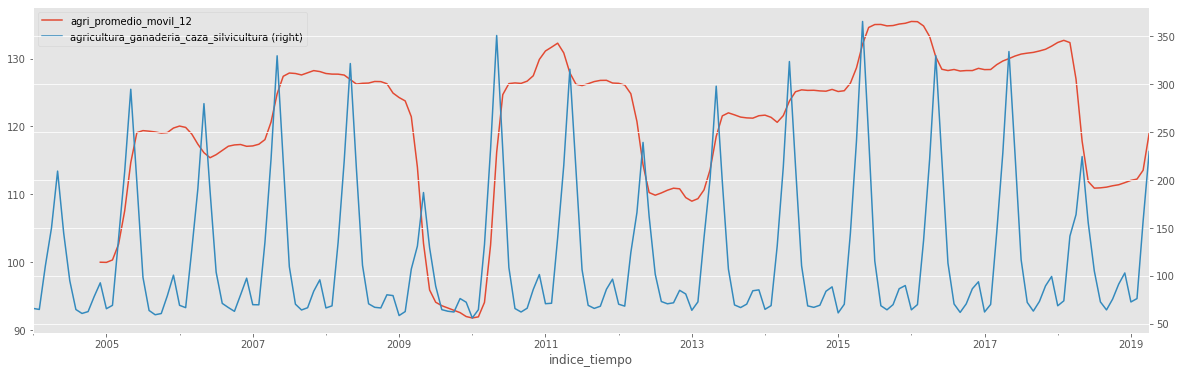

In [31]:
nivel_actividad[["agri_promedio_movil_12", "agricultura_ganaderia_caza_silvicultura"]].plot(
    figsize=(20,6), secondary_y="agricultura_ganaderia_caza_silvicultura")

**Ejercicio:** chequear la correlación entre las variaciones _interanuales_ (12 meses) del EMAE y sus componentes sectoriales.

In [40]:
emae.head()


,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo,indice_serie_original
indice_tiempo,,,
2004-01-01,98.411054,96.048136,92.627506
2004-02-01,98.241264,96.653295,90.186179
2004-03-01,97.562830,97.314966,101.883298
2004-04-01,95.497671,98.007126,102.567430
2004-05-01,96.690407,98.728091,109.877504


In [46]:
emae.pct_change(12).corr()

,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo,indice_serie_original
indice_serie_desestacionalizada,1.000000,0.970141,0.977812
indice_serie_tendencia_ciclo,0.970141,1.000000,0.931127
indice_serie_original,0.977812,0.931127,1.000000


## Ejercicios para la casa

**Ejercicio para hacer en casa:** crear un simple tablero de seguimiento de variables de coyuntura usando _subplots_ que contenga la evolución del tipo de cambio BNA vendedor (promedio móvil 30 días), la tasa de interés de política monetaria, la inflación interanual mensual (`pct_change(12)`, la expectativa de inflación de los próximos 12 meses, las variaciones porcentuales mensuales del nivel de actividad (EMAE) y el saldo comercial mensual (promedio móvil 3 meses).

In [61]:
Inflación_PM= pd.read_csv("http://infra.datos.gob.ar/catalog/sspm/dataset/431/distribution/431.1/download/expectativas-inflacion-a-doce-mes.csv")
Inflación_PM.head()

,indice_tiempo,expectativa_inflacion_mediana,expectativa_inflacion_promedio
0,2006-08-01,10.0,13.732315
1,2006-09-01,10.0,11.885915
2,2006-10-01,10.0,11.728203
3,2006-11-01,10.0,12.726685
4,2006-12-01,10.0,13.863447


In [27]:
Inflación_PM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 3 columns):
indice_tiempo                     153 non-null object
expectativa_inflacion_mediana     153 non-null float64
expectativa_inflacion_promedio    153 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.7+ KB


In [62]:
Inflación_PM["indice_tiempo"] = pd.to_datetime(Inflación_PM["indice_tiempo"])

In [63]:
Inflación_PM = Inflación_PM.set_index("indice_tiempo")

In [82]:
Inflación_PM.head()

,expectativa_inflacion_mediana,expectativa_inflacion_promedio
indice_tiempo,,
2006-08-01,10.0,13.732315
2006-09-01,10.0,11.885915
2006-10-01,10.0,11.728203
2006-11-01,10.0,12.726685
2006-12-01,10.0,13.863447


In [86]:
Inflación_PM.pct_change(12)

,expectativa_inflacion_mediana,expectativa_inflacion_promedio
indice_tiempo,,
2006-08-01,NaN,NaN
2006-09-01,NaN,NaN
2006-10-01,NaN,NaN
2006-11-01,NaN,NaN
2006-12-01,NaN,NaN
2007-01-01,NaN,NaN
2007-02-01,NaN,NaN
2007-03-01,NaN,NaN
2007-04-01,NaN,NaN


In [87]:
emae.pct_change(1)

,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo,indice_serie_original
indice_tiempo,,,
2004-01,NaN,NaN,NaN
2004-02,-0.001725,0.006301,-0.026356
2004-03,-0.006906,0.006846,0.129700
2004-04,-0.021167,0.007113,0.006715
2004-05,0.012490,0.007356,0.071271
2004-06,0.018291,0.007546,-0.038362
2004-07,0.025450,0.007762,-0.043113
2004-08,0.009530,0.007983,-0.027211
2004-09,0.005325,0.008144,-0.002739


In [85]:
Inflación_PM_proy = Inflación_PM [Inflación_PM.index > "20161201"]
Inflación_PM_proy.head()

,expectativa_inflacion_mediana,expectativa_inflacion_promedio
indice_tiempo,,
2017-01-01,25.0,29.2
2017-02-01,25.0,31.2
2017-03-01,25.0,31.3
2017-04-01,20.0,27.4
2017-05-01,21.0,27.9
